# Introduction to Statistical Learning

## Estimation of $f$
- $X$: matrix of predictors
- $Y$: response variable
- $f()$: unknown function that connects x with y
- $\epsilon$: error term

$$Y = f(X) + \epsilon$$

---
> Goal: Find the best $f$ for the data

### Why estimate $f$?
- **Prediction**
    - $\hat{Y}= f(\hat{X})$
    - $$E(Y − \hat{Y})^2 \ = \ E[f(X) + \varepsilon - \hat{f}(X)]^2 = \underbrace{[f(X) - \hat{f}(X)]^2}_{\text{Reducible}} + \underbrace{Var(\varepsilon)}_{\text{Irreducible}}$$
    - **Reducible**: improve the accuracy of $\hat{f}$
        - Choosing the appropiate ML technique
    - **Irrdecuible**: measurement error due to $\epsilon$
        - $\epsilon$ can never be predicted by using $X$
    - Ex: Predict GDP of a town? 
    
- **Inference** 
    - How $Y$ is related with a set of $X$s
    - Ex: How does investment in radio relate to investment in newspapers?

### How do we estimate $f$?
- Teach the computer $\hat{f}$
- **Parametric**
    - Model-based approach:
        1. Make an assumption about the *functional form* (e.g., linear) by estimating the coefficients $$f(X) = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p$$
        2. *Train* the model using the data by estimating the parameters $$Y \approx \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p$$
    - Easy to estimate a set of paramteres in a linear model
    - May *overfit* our estimates
- **Non-parametric**
    - Doesn't assume
    - Seeks an estimate f that gets as close to the data
    - Overfit
    
---
**Overfitting**: estimation does well in the training set but not applied to other observations in the real-world

### Tradeoffs
- Flexibility vs interpretability
- Inference &rarr; restrictive model (e.g., linear model)
- Prediction &rarr; flexible model as it captures more nuanced relationships
- Ex: Tesla's self-driving cars
    - Predict: When to turn?
    - Interpretability: Why do people complain about self-driving Teslas?

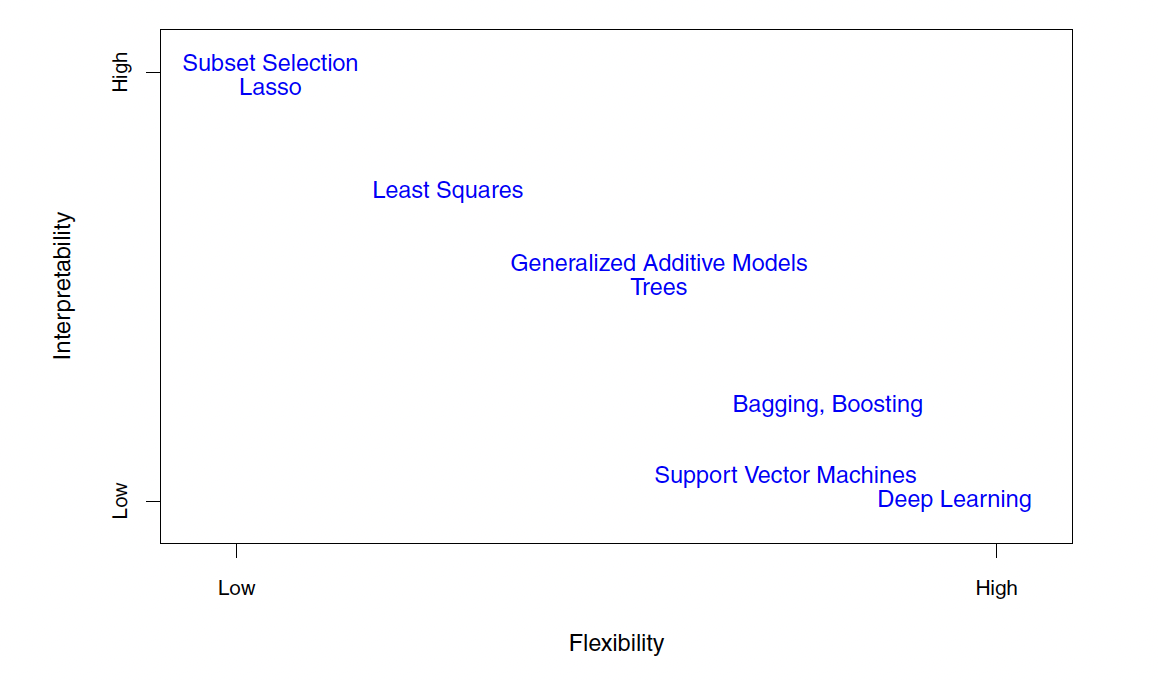

### Approaches
- **Supervised**: for each observation $x_{i}$ we have to target $y_{i}$
    - Fit a model that relates the reponse to the predictors with the aim of accurately predicting the response for future observations (*prediction*) or better understanding the relationship between the response and the predictors (*inference*)
    - 2 Categories
        - Classification: output variable is a category (color)
        - Regression: output variable is a real value (weight)
    - ***Examples***
        - *Linear Regression*, *Logistic Regression*, *Generalized Additive Models (GAM)*, etc.
- **Unsupervised**: no target $y_{i}$, only $x_{i}$s
    - Unable to fit a linear regression model as there's no response variable
    - Allows the model to work on its own to discover patters and information
    - 2 Categories
        - Clustering: discover inherent groupings in the data (customer spending level)
        - Association: discover rules that describe large portions of your data (people that buy $X$ also tends to buy $Y$)
    - ***Examples***
        - *Principal Component Analysis (PCA)*, *K-Nearest Neighbors (KNN)*, *Neural Networks*
- **Semi-Supervised**: we know a few $y_{i}$ but we want to predict the $y_{i}$s for the majority of the data (image classification)

---
> Usually, the ML method relies on the basis of the response type. Though, whether the predictors are qualitative or quantitative has less weight as the ML methods can be applied so long as the qualitative predictors are coded before the analysis.

## Model Accuracy
- *There is no free lunch in statistics*
    - No one method dominates all others over all possible data sets
- To evaluate the performace of an ML method, we need to measure how well its predictors actually match the observed data

### Mean Squared Error (MSE)
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i − \hat{f}(x_i))^2 $$
- Difference between the true and predicted value squared
- How close a regression line is to a set of data points
- *Small* if the predicted response asre very close to the true responses and *larg*e if the predicted and true responses differ substantially
- Can compute in the *training* data though we want to know how it performs in the *test* data 

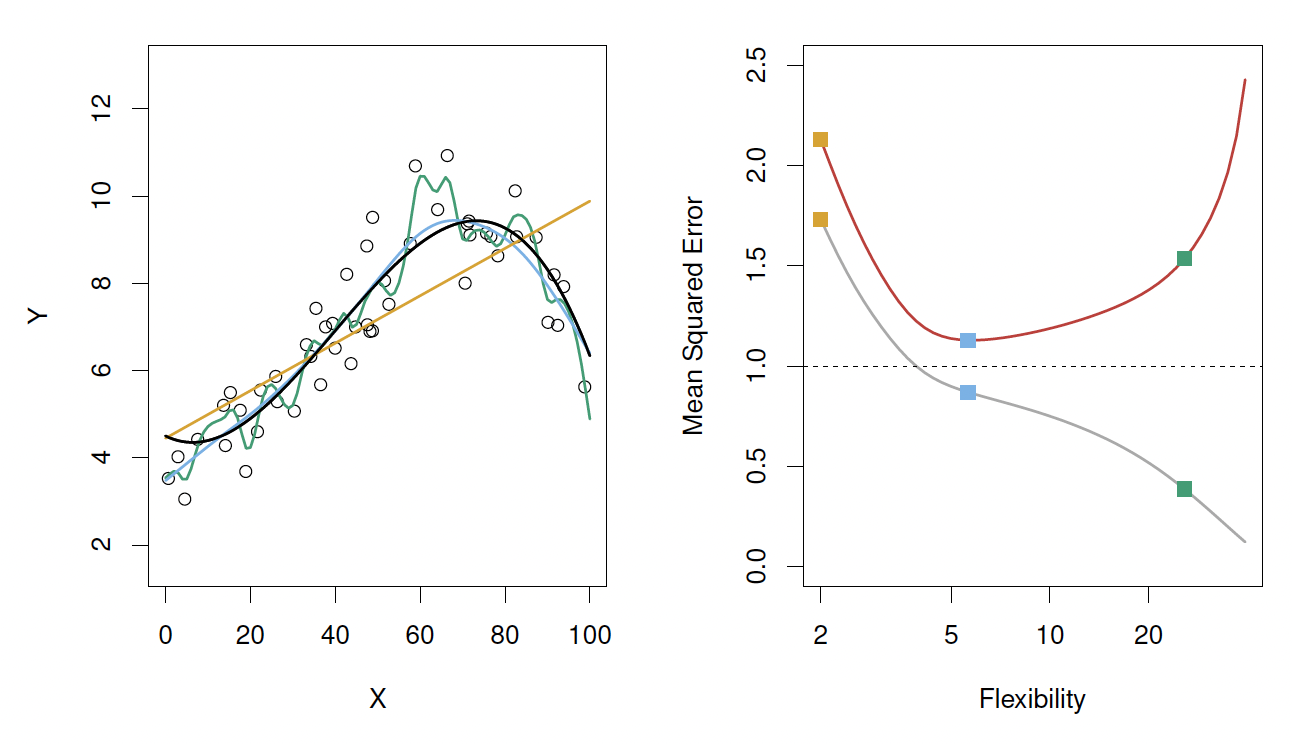 

**Left Panel**

- **Orange**: linear regression
- **Blue and Green**: smoothing spline
- **Black**: true $f$

*As the the level of flexibility increases, the curves fit the observed data more closely.*

The green curve (smoothing spline) is the most flexible and matches the data very well thought it fits the true $f$ poorly (wiggly).

**Right Panel**

- **Grey**: training MSE
- **Red**: test MSE
- **Dashed**: minimum possible test MSE (irreducible error $Var(\epsilon)$)
- **Squares**: training and test MSEs corresponding to the left panel


As shown in the orange squares for both the train and test MSE, a more restricted/smoother curve has fewer degress of freedom than (number of IV's that can vary). 

As the flexibility increases, the *training* MSE declines. The green curve has the lowest training MSE. Likewise, for the *test* MSE, inditally declines as the level of flexibility increases though it levels off and starts to increase.

Both the *orange* and *green* curves have high test MSE's which makes sense given that the **blue curve best estimates $f$**.

*As model flexibility increases, training MSE will decrease but the test MSE may not.* When a ML method yield a small training MSE but a large test MSE, the data is *overfitting*. This is because the supposed patterns found by the ML method in the training data doesn't exist in the test data.

---
> **Goal**: lowest *test* MSE 

### The Bias-Variance Trade-Off
- The U-shape in the above image is the result of two competing properties in nL method
- The expected *test* MSE can always be demcomposed into the sum of three fundamental quantities: $$ E(y_0 - \hat{f}(x_0))^2 \ = \ Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\varepsilon) $$
    - In order to minimize the expected test error, we need a ML model that achieves **low variance** and **low bias** 
        - **Variance**: amount by which $\hat{f}$ would change if we estimates it using a different training data set
            - More flexible ML methods have higher variance (e.g, green curve &rarr; flexible  and orange curves &rarr; inflexible)
        - **Bias**: error that is introduces by approximating a real-life problem
            - Linear regression assumes a linear relationship which is unlikely &rarr; bias in the estimate of $f$
- As we use more *flexible methods*, the **variance increases** and the **bias decreases**

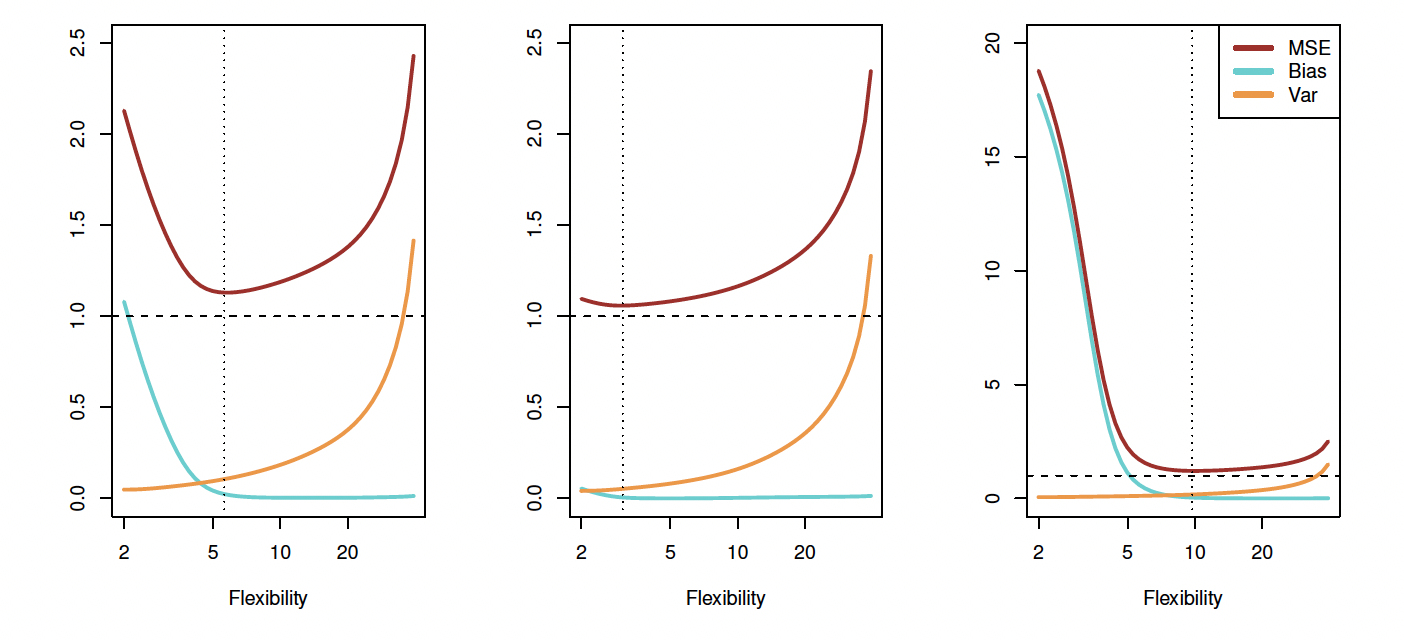

*Left-most panel corresponds to the image under MSE. See textbook for more info*

---
> **Goal**: fit a model that has low bias and low variance 